# **Cancer predicting Model**

### **Imorting the requirements**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
import tensorflow as tf


### **Data importing and preparation**

In [30]:
dataset=pd.read_csv('cancer.csv')
print(dataset.shape)

(569, 31)


In [31]:
x=dataset.drop(columns=['diagnosis(1=m, 0=b)'])

In [32]:
#dataset without the diagonosis column 
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
y=dataset['diagnosis(1=m, 0=b)']

In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis(1=m, 0=b), Length: 569, dtype: int64

### **Splitting into the training set and the Test set**

In [35]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2)

### **Training the model using tensorflow**

In [36]:


model=tf.keras.models.Sequential()
b=x_train.shape[1:]

In [37]:
b

(30,)

In [38]:
model.add(tf.keras.layers.Dense(256,input_shape=x_train.shape[1:],activation='sigmoid'))
model.add(tf.keras.layers.Dense(256,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

c:\Users\Samee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [40]:
model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6863 - loss: 0.6313
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.4138 
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.2928 
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9152 - loss: 0.2487 
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8945 - loss: 0.2291 
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9229 - loss: 0.2318 
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8808 - loss: 0.2900 
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.2239 
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9323 - loss: 0.1933 
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.1733 
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9424 - loss: 0.1634 
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

In [41]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.1188  


[0.16303354501724243, 0.9473684430122375]

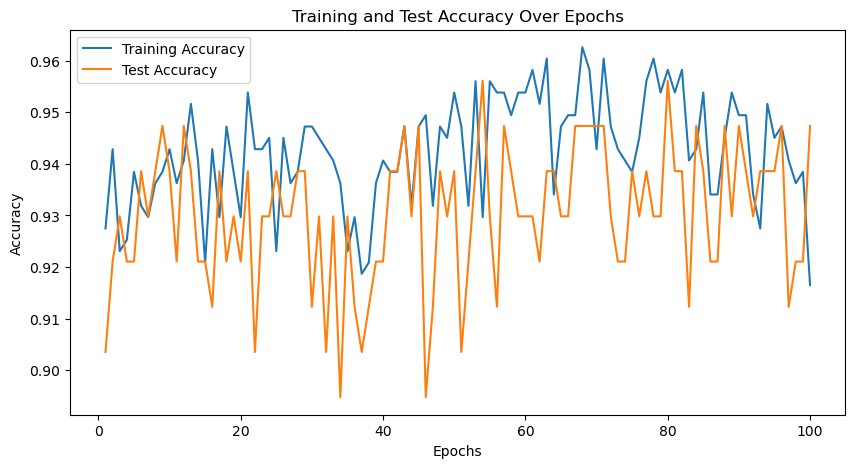

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Store training and test accuracy
train_accuracy = []
test_accuracy = []

# Train the model
epochs = 100
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, verbose=0)
    train_accuracy.append(history.history['accuracy'][0])
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accuracy.append(test_acc)

# Plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.show()
